**DSMP - Neural Prophet on csv**
Week 18

In [201]:
# importing file 
import csv
import pandas as pd
data_path = '/Users/brookegrantham/Documents/Tst2022-01-07tapes.csv'

raw_data = pd.read_csv(data_path, header=None, usecols=[2,3], na_filter=False, names=('Time','value'), nrows=500)

In [138]:
raw_data

,Time,value
0,2.688,187
1,5.408,187
2,6.944,187
3,6.944,210
4,9.264,197
...,...,...
495,241.408,216
496,241.472,216
497,241.472,215
498,242.656,215


In [202]:
# creating date column
import datetime
raw_data.insert(0,'date_time', '07-01-2022 ')
raw_data.head()


,date_time,Time,value
0,07-01-2022,2.688,187
1,07-01-2022,5.408,187
2,07-01-2022,6.944,187
3,07-01-2022,6.944,210
4,07-01-2022,9.264,197


In [203]:
# Converting milliseconds into time format
for i in range(len(raw_data.Time)):
    raw_data['Time'][i] = str(datetime.timedelta(seconds=raw_data['Time'][i]))
raw_data.head()

WARNING - (py.warnings._showwarnmsg) - <ipython-input-203-d507a0dc267d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['Time'][i] = str(datetime.timedelta(seconds=raw_data['Time'][i]))

WARNING - (py.warnings._showwarnmsg) - /Users/brookegrantham/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)



,date_time,Time,value
0,07-01-2022,0:00:02.688000,187
1,07-01-2022,0:00:05.408000,187
2,07-01-2022,0:00:06.944000,187
3,07-01-2022,0:00:06.944000,210
4,07-01-2022,0:00:09.264000,197


In [204]:
# combining the date and time columns 
raw_data['final_date'] = raw_data.date_time.str.cat(raw_data.Time)
raw_data.head()

,date_time,Time,value,final_date
0,07-01-2022,0:00:02.688000,187,07-01-2022 0:00:02.688000
1,07-01-2022,0:00:05.408000,187,07-01-2022 0:00:05.408000
2,07-01-2022,0:00:06.944000,187,07-01-2022 0:00:06.944000
3,07-01-2022,0:00:06.944000,210,07-01-2022 0:00:06.944000
4,07-01-2022,0:00:09.264000,197,07-01-2022 0:00:09.264000


In [120]:
pip install neuralprophet

Note: you may need to restart the kernel to use updated packages.


<function matplotlib.pyplot.show(close=None, block=None)>

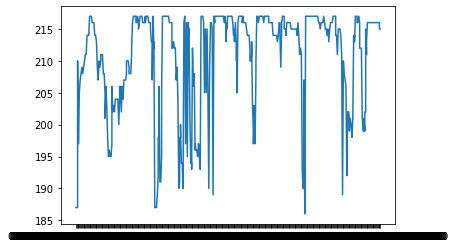

In [191]:
# just plotting raw data to have a look
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt

plt.plot(raw_data.final_date,raw_data.value)
plt.show

In [205]:
# creating the data frame --- neural phrophet needs the columns labelled ds and y for date and the data
data2 = pd.DataFrame({'ds': raw_data.final_date, 'y':raw_data.value.astype(int)})
data2

,ds,y
0,07-01-2022 0:00:02.688000,187
1,07-01-2022 0:00:05.408000,187
2,07-01-2022 0:00:06.944000,187
3,07-01-2022 0:00:06.944000,210
4,07-01-2022 0:00:09.264000,197
...,...,...
495,07-01-2022 0:04:01.408000,216
496,07-01-2022 0:04:01.472000,216
497,07-01-2022 0:04:01.472000,215
498,07-01-2022 0:04:02.656000,215


In [206]:
# attempting the apply neural prophet to the data 
clf = NeuralProphet()
model = clf.fit(data2)

ValueError: Column ds has duplicate values. Please remove duplicates.

In [81]:
help(NeuralProphet)

Help on class NeuralProphet in module neuralprophet.forecaster:

class NeuralProphet(builtins.object)
 |  NeuralProphet(growth='linear', changepoints=None, n_changepoints=10, changepoints_range=0.9, trend_reg=0, trend_reg_threshold=False, yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', seasonality_mode='additive', seasonality_reg=0, n_forecasts=1, n_lags=0, num_hidden_layers=0, d_hidden=None, ar_sparsity=None, learning_rate=None, epochs=None, batch_size=None, loss_func='Huber', optimizer='AdamW', newer_samples_weight=2, newer_samples_start=0.0, impute_missing=True, collect_metrics=True, normalize='auto', global_normalization=False, global_time_normalization=True, unknown_data_normalization=False)
 |  
 |  NeuralProphet forecaster.
 |  
 |  A simple yet powerful forecaster that models:
 |  Trend, seasonality, events, holidays, auto-regression, lagged covariates, and future-known regressors.
 |  Can be regualrized and configured to model nonlinear relation